Exercise 4.1 

In [1]:
#import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D



# Load the dataset
data = pd.read_csv("population_us.csv")
data


,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


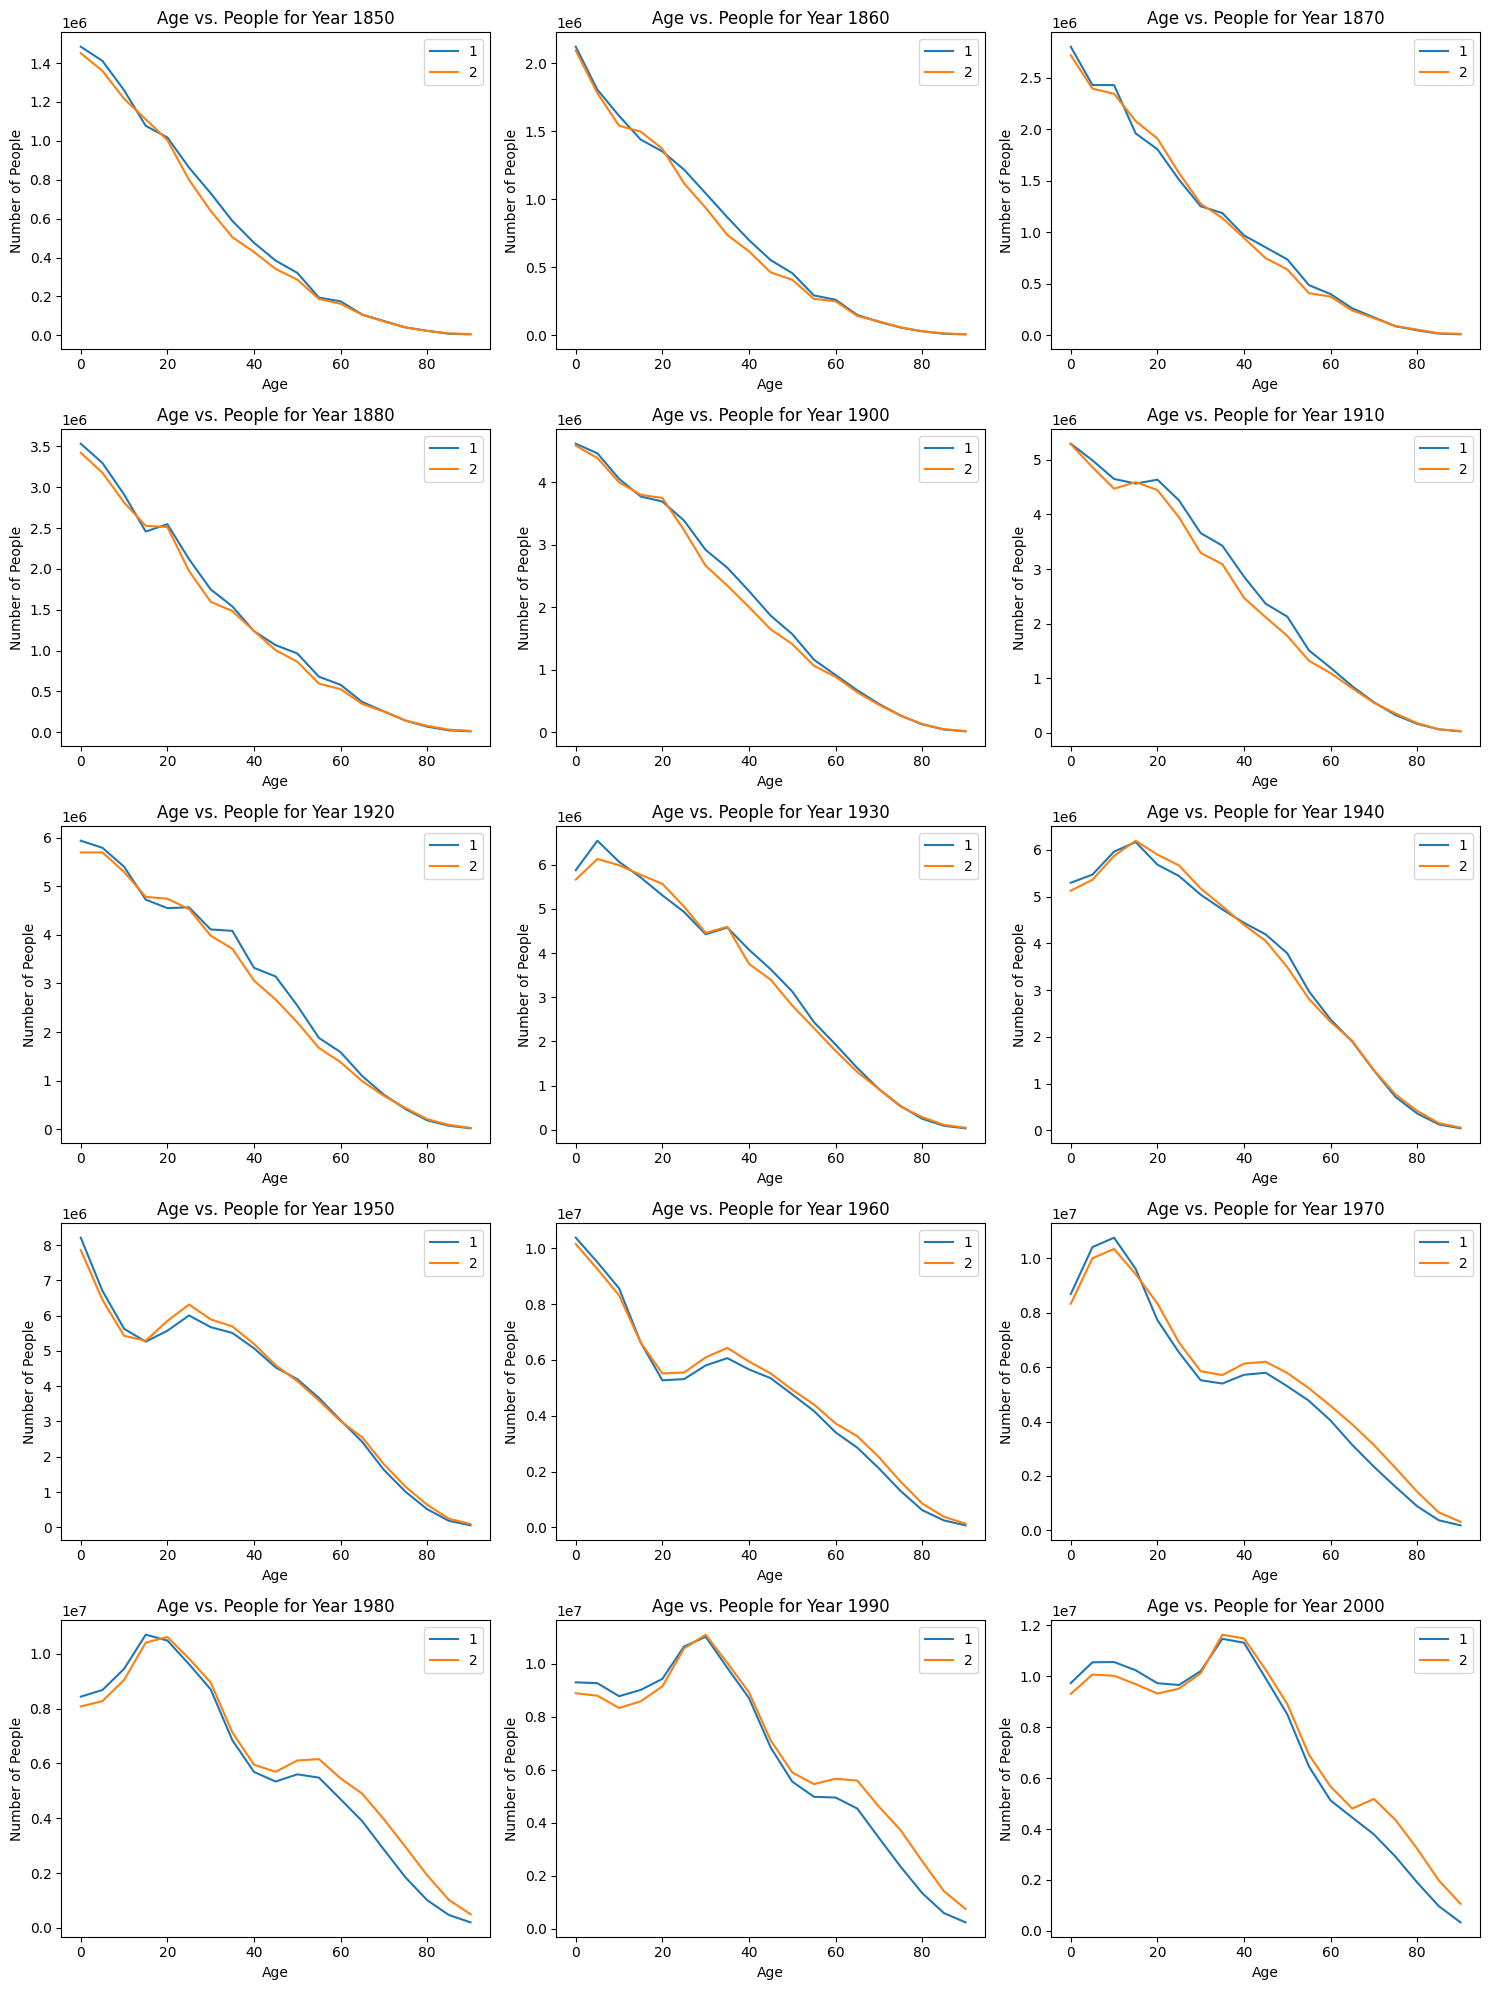

In [2]:
fig, axs = plt.subplots(5,3, figsize=(15, 20))  # adjust as necessary
axs = axs.ravel()  # Flatten the array for easy iterating

for i, year in enumerate(sorted(data['year'].unique())):
    year_data = data[data['year']==year]
    grouped = year_data.groupby(['age', 'sex'])['people'].sum().unstack()
    grouped.plot(ax=axs[i], kind='line')  # Use ax parameter to specify the subplot
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Number of People')
    axs[i].set_title(f'Age vs. People for Year {year}')
    axs[i].legend(title='Sex')
    axs[i].legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

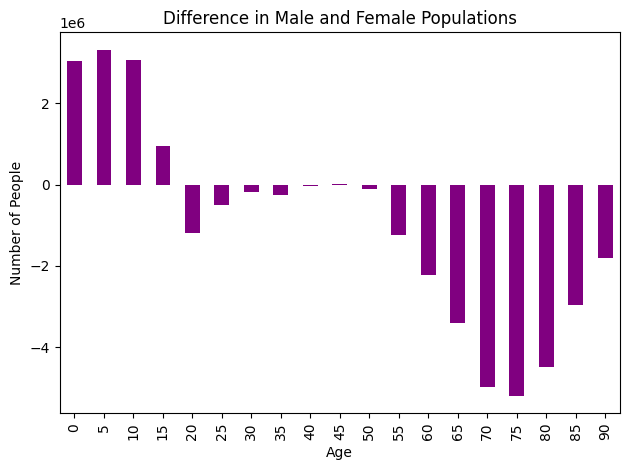

In [3]:
male_data = data[data['sex'] == 1]
female_data = data[data['sex'] == 2]

female_data = female_data.groupby(['age'])['people'].sum()
male_data = male_data.groupby(['age'])['people'].sum()

# Calculate difference
difference = male_data - female_data

# Plot difference
difference.plot(kind='bar', color='purple')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Difference in Male and Female Populations')

plt.tight_layout()
plt.show()

Exercise 4.2

In [4]:
import plotly.graph_objects as go
import numpy as np

# Define points and triangles for the unit cube
cube_points = np.array([
    [0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1],
    [1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]
], dtype=np.double)

cube_triangles = np.array([
    [0, 1, 2], [0, 2, 3],
    [4, 6, 5], [4, 7, 6],
    [1, 5, 6], [1, 6, 2],
    [0, 4, 5], [0, 5, 1],
    [0, 3, 7], [0, 7, 4],
    [3, 2, 6], [3, 6, 7]
])

# Plot the unit cube
fig_cube = go.Figure(data=[
    go.Mesh3d(
        x=cube_points[:, 0],
        y=cube_points[:, 1],
        z=cube_points[:, 2],
        i=cube_triangles[:, 0],
        j=cube_triangles[:, 1],
        k=cube_triangles[:, 2],
        color='blue',
        opacity=0.50
    )
])

fig_cube.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    width=600, height=600
)

# Define parameters for the cylinder
num_r = 50
num_theta = 100
r = np.linspace(0, 1, num_r)
theta = np.linspace(0, 2 * np.pi, num_theta)
r_grid, theta_grid = np.meshgrid(r, theta)

# Calculate x, y, z coordinates for the cylinder
x_cylinder = r_grid * np.cos(theta_grid)
y_cylinder = r_grid * np.sin(theta_grid)
z_cylinder = np.zeros_like(x_cylinder)

# Create triangles for the cylinder
cylinder_triangles = []
def grid_index_to_flat(r_idx, theta_idx):
    return r_idx * num_theta + theta_idx

for i in range(num_r - 1):
    for j in range(num_theta):
        curr = grid_index_to_flat(i, j)
        right = grid_index_to_flat(i, (j + 1) % num_theta)
        upper = grid_index_to_flat(i + 1, j)
        upper_right = grid_index_to_flat(i + 1, (j + 1) % num_theta)
        cylinder_triangles.append([curr, right, upper])
        cylinder_triangles.append([right, upper_right, upper])

# Plot the cylinder
fig_cylinder = go.Figure(data=[
    go.Mesh3d(   
        x=x_cylinder.flatten(),
        y=y_cylinder.flatten(),
        z=z_cylinder.flatten(),
        i=[t[0] for t in cylinder_triangles],
        j=[t[1] for t in cylinder_triangles],
        k=[t[2] for t in cylinder_triangles],
        opacity=0.5,
        color='lightblue'
    )
])

fig_cylinder.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z")
    ),
    width=600, height=600,
    title="Triangular Mesh Approximation of the Unit Cylinder"
)

# Show the plots
fig_cube.show()
fig_cylinder.show()


In [5]:
num_theta = 100
num_z = 50
theta = np.linspace(0, 2 * np.pi, num_theta)
z = np.linspace(0, 1, num_z)
theta_grid, z_grid = np.meshgrid(theta, z)

# Calculate x, y, z coordinates for the cylinder surface
x_cylinder = np.cos(theta_grid)
y_cylinder = np.sin(theta_grid)

# Plot the cylinder surface
fig = go.Figure(data=[go.Surface(x=x_cylinder, y=y_cylinder, z=z_grid)])
fig.update_layout(
    title="Mesh of the Cylinder Surface",
    autosize=False,
    width=600, height=600,
    margin=dict(l=65, r=50, b=65, t=90)
)
fig.show()